In [155]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [129]:
df = pd.read_csv("terminal_schedule(2019~2020)_전처리완료(실제).csv", encoding='utf-8')
df.head()

,Unnamed: 0,스케줄 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집일시,잔류 시간
0,65219,823853,HPNT,2019,HCSO,10,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:00,56880
1,65452,824096,IGCT,2019,COTW,12,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:00,32940
2,65800,824698,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:00,71100
3,65825,824724,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:00,71100
4,65853,824754,HJIT,2019,KSCL,13,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:00,43200


In [130]:
df['작업치'] = df['잔류 시간'] / (df['선적 작업 수량'] +df['양하 작업 수량'])
df.head()

,Unnamed: 0,스케줄 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집일시,잔류 시간,작업치
0,65219,823853,HPNT,2019,HCSO,10,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:00,56880,80.680851
1,65452,824096,IGCT,2019,COTW,12,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:00,32940,106.601942
2,65800,824698,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:00,71100,42.397138
3,65825,824724,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:00,71100,42.498506
4,65853,824754,HJIT,2019,KSCL,13,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:00,43200,46.451613


In [131]:
df.shape

(2031, 13)

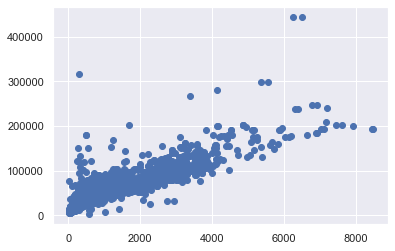

In [132]:
work = df[['선적 작업 수량', '양하 작업 수량', '잔류 시간']]
index_x = work['선적 작업 수량'] + work['양하 작업 수량']
index_y = work['잔류 시간']
plt.plot(index_x, index_y, linestyle='none', marker='o')
plt.show()

<Figure size 432x288 with 0 Axes>

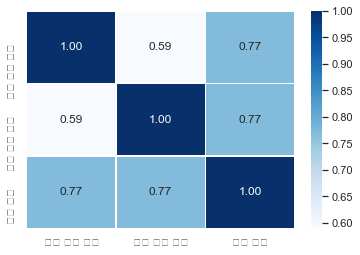

In [133]:
plt.figure(figsize=(6,4))
sns.heatmap(data=work.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

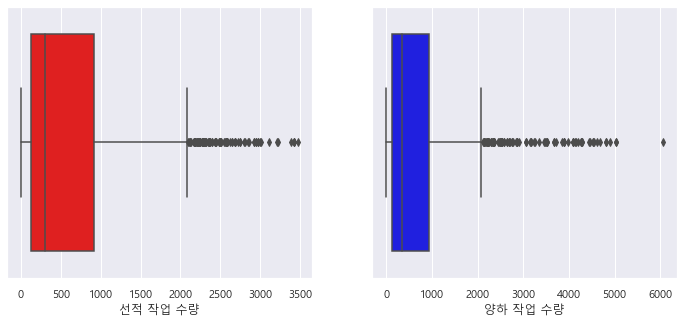

In [140]:
# 이상치 시각화
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(12)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1)
sns.boxplot(x=df['선적 작업 수량'],color="red", ax=axes[0])
sns.boxplot(x=df['양하 작업 수량'],color="blue", ax=axes[1])

In [141]:
q1 = df['작업치'].quantile(0.25)
q3 = df['작업치'].quantile(0.75)
IQR = q3-q1
filter_df = df[(df['작업치'] < (q1 - 1.5 * IQR)) | (df['작업치'] > (q3 + 1.5 * IQR))]
df = df.drop(filter_df.index)
df.shape
df.head()

(1923, 13)

,Unnamed: 0,스케줄 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집일시,잔류 시간,작업치
0,65219,823853,HPNT,2019,HCSO,10,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:00,56880,80.680851
1,65452,824096,IGCT,2019,COTW,12,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:00,32940,106.601942
2,65800,824698,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:00,71100,42.397138
3,65825,824724,PNC,2019,EMTL,2,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:00,71100,42.498506
4,65853,824754,HJIT,2019,KSCL,13,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:00,43200,46.451613


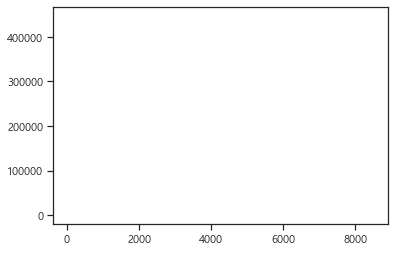

In [181]:
work = df[['선적 작업 수량', '양하 작업 수량', '잔류 시간']]
index_x = work['선적 작업 수량'] + work['양하 작업 수량']
index_y = work['잔류 시간']
plt.plot(index_x, index_y, linestyle='none', marker='x')
plt.show()

<Figure size 432x288 with 0 Axes>

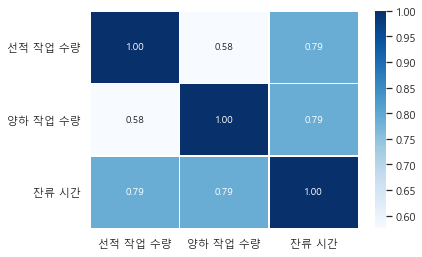

In [146]:
plt.figure(figsize=(6,4))
sns.heatmap(data=work.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

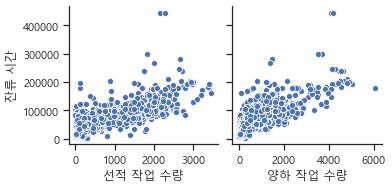

In [156]:
sns.pairplot(work, x_vars=['선적 작업 수량', '양하 작업 수량'],y_vars=['잔류 시간'])

In [64]:
from statsmodels.formula.api import ols

In [65]:
# 필요없는 column을 제거하고 회귀분석 
X = work.drop(['잔류 시간'], axis='columns')
y = work['잔류 시간']
res = ols('y ~ X', data=work).fit()

In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     3655.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:48:07   Log-Likelihood:                -21721.
No. Observations:                1923   AIC:                         4.345e+04
Df Residuals:                    1920   BIC:                         4.346e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.393e+04    632.318     37.839      0.000    2.27e+04    2.52e+04
X[0]          30.2385      0.768     39.362      0.000      28.732      31.745
X[1]          27.1522      0.688     39.453      0.000      25.802      28.502
==============================================================================
Omnibus:                     1456.715   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74512.028
Skew:                           3.055   Prob(JB):                         0.00
Kurtosis:                      32.877   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1730, 2)
X_test shape: (193, 2)
y_train shape: (1730,)
y_test shape: (193,)


### Linear Regression

In [69]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([36140.60599534, 28908.40256445, 30527.86994188, 77803.08912577,
       43383.35829663])

In [71]:
model.score(X_test, y_test)

0.8445279050405072

<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

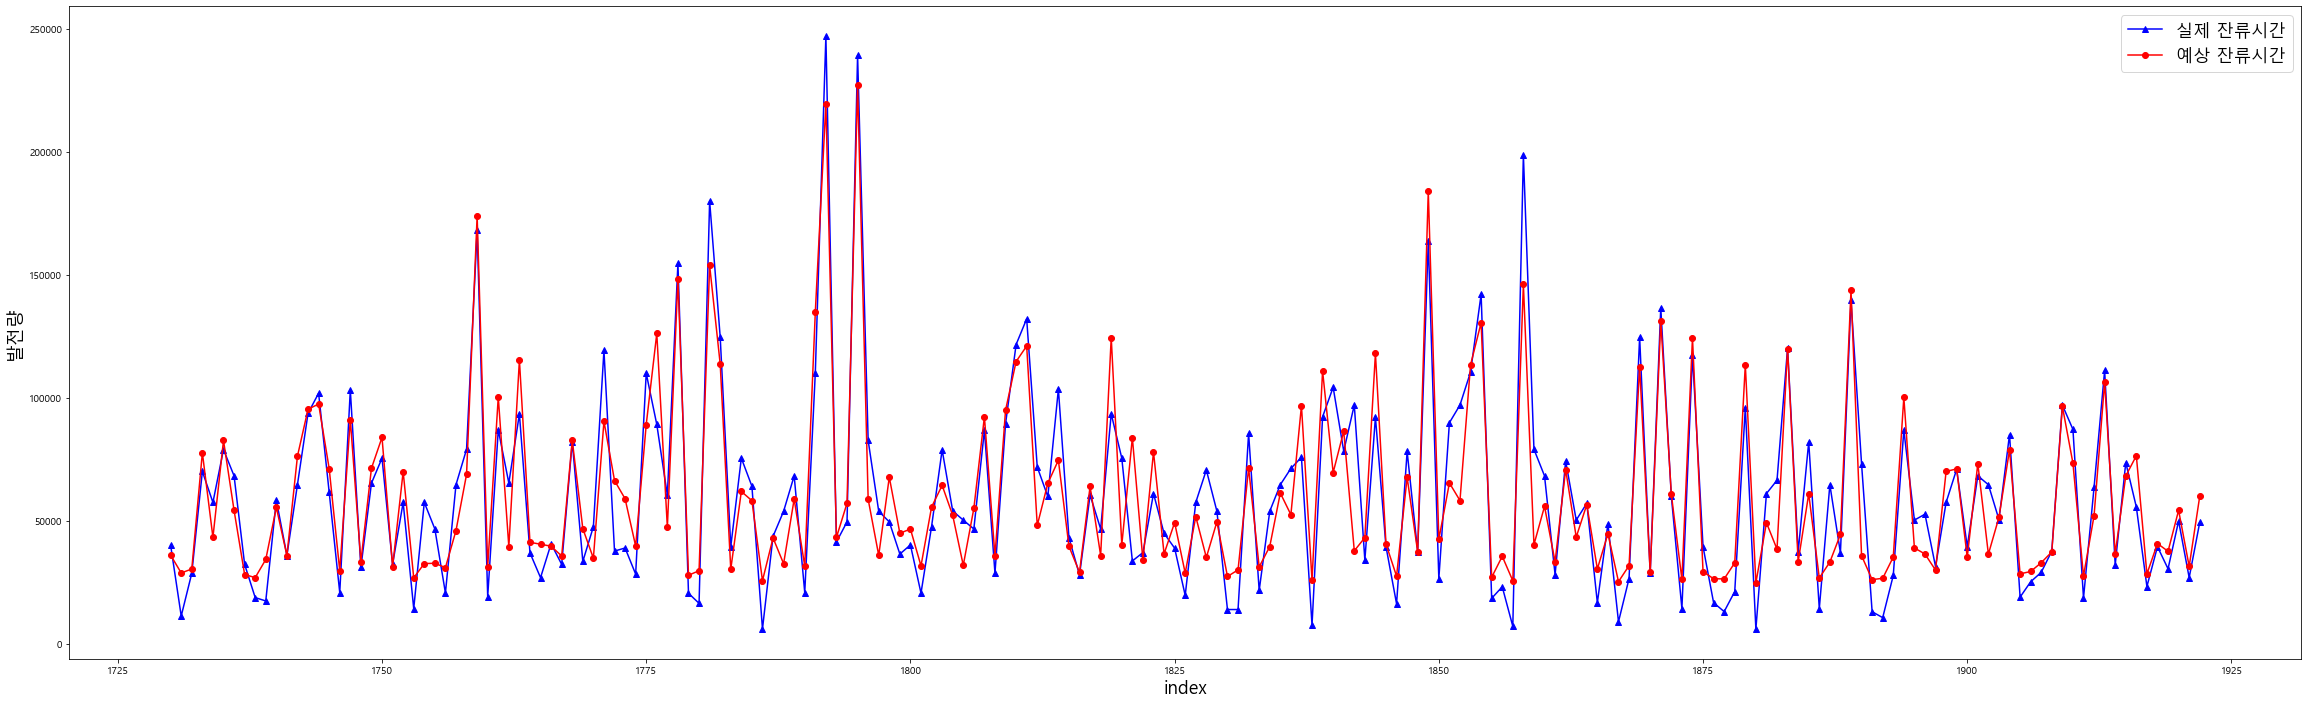

In [72]:
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
#plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Ridge_Lasso 회귀

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [74]:
# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.786635
테스트 세트 점수: 0.844528


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

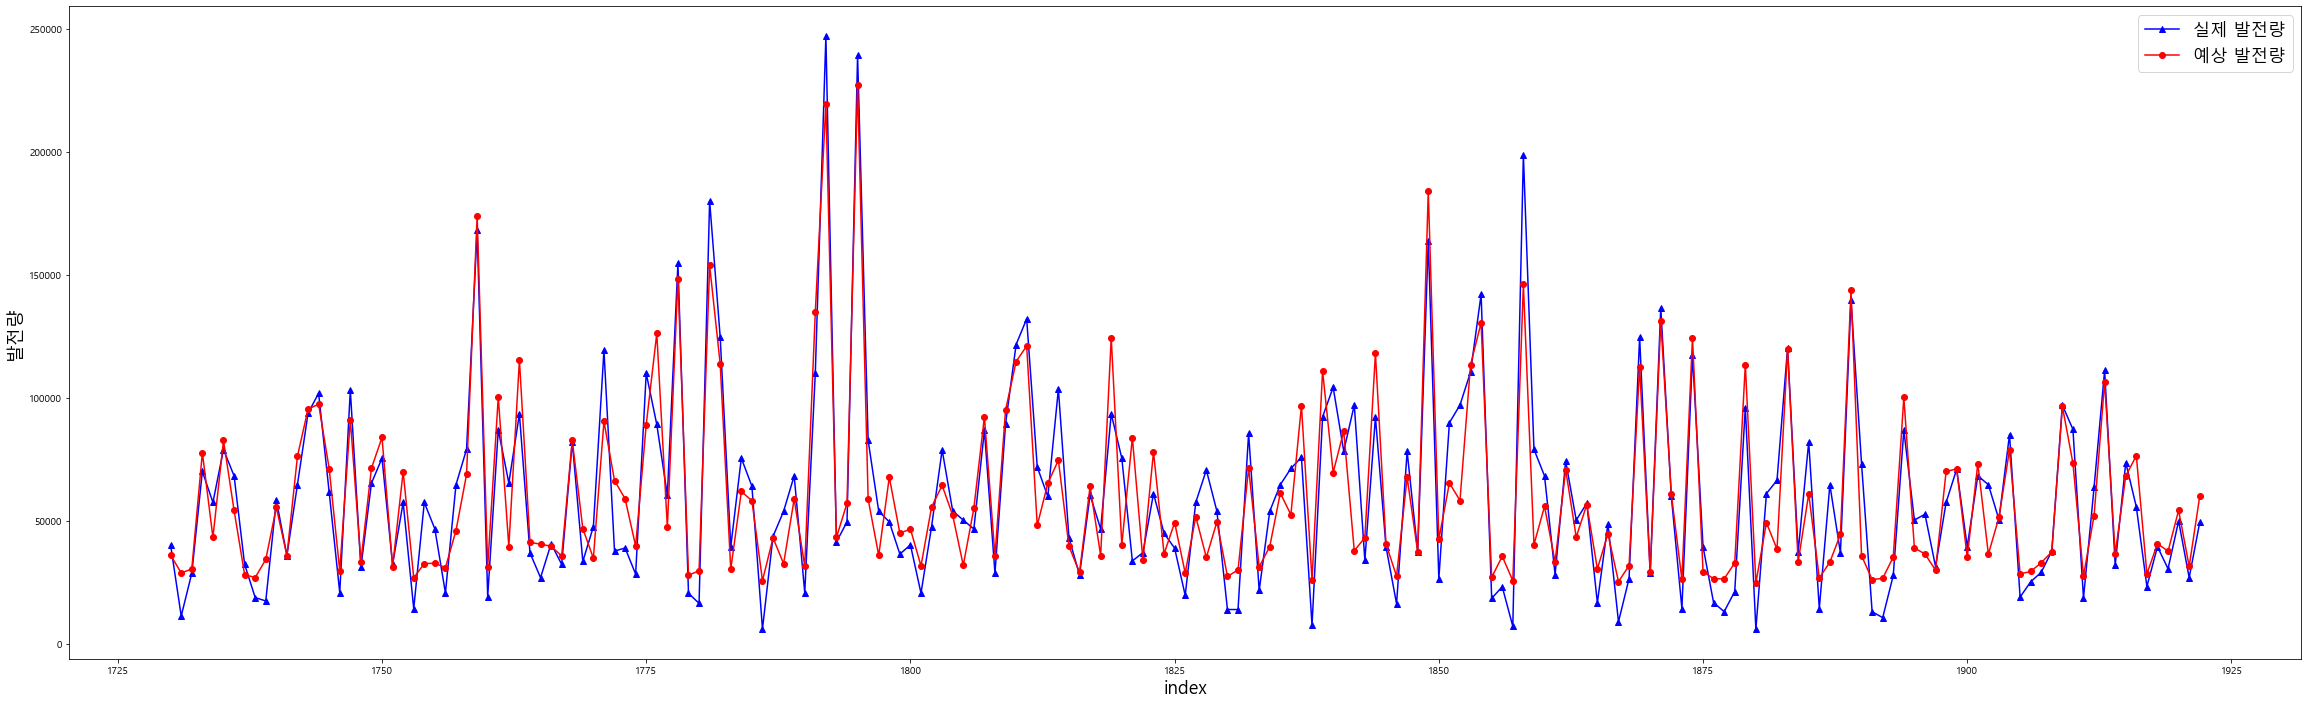

In [75]:
predictions = model_ridge_alpha_10.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
# plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Lasso Regression

In [76]:
# lasso001
model_lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso001.coef_ != 0 )   ))

훈련 세트 점수: 0.786635
테스트 세트 점수: 0.844528
사용한 특성의 수: 2


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

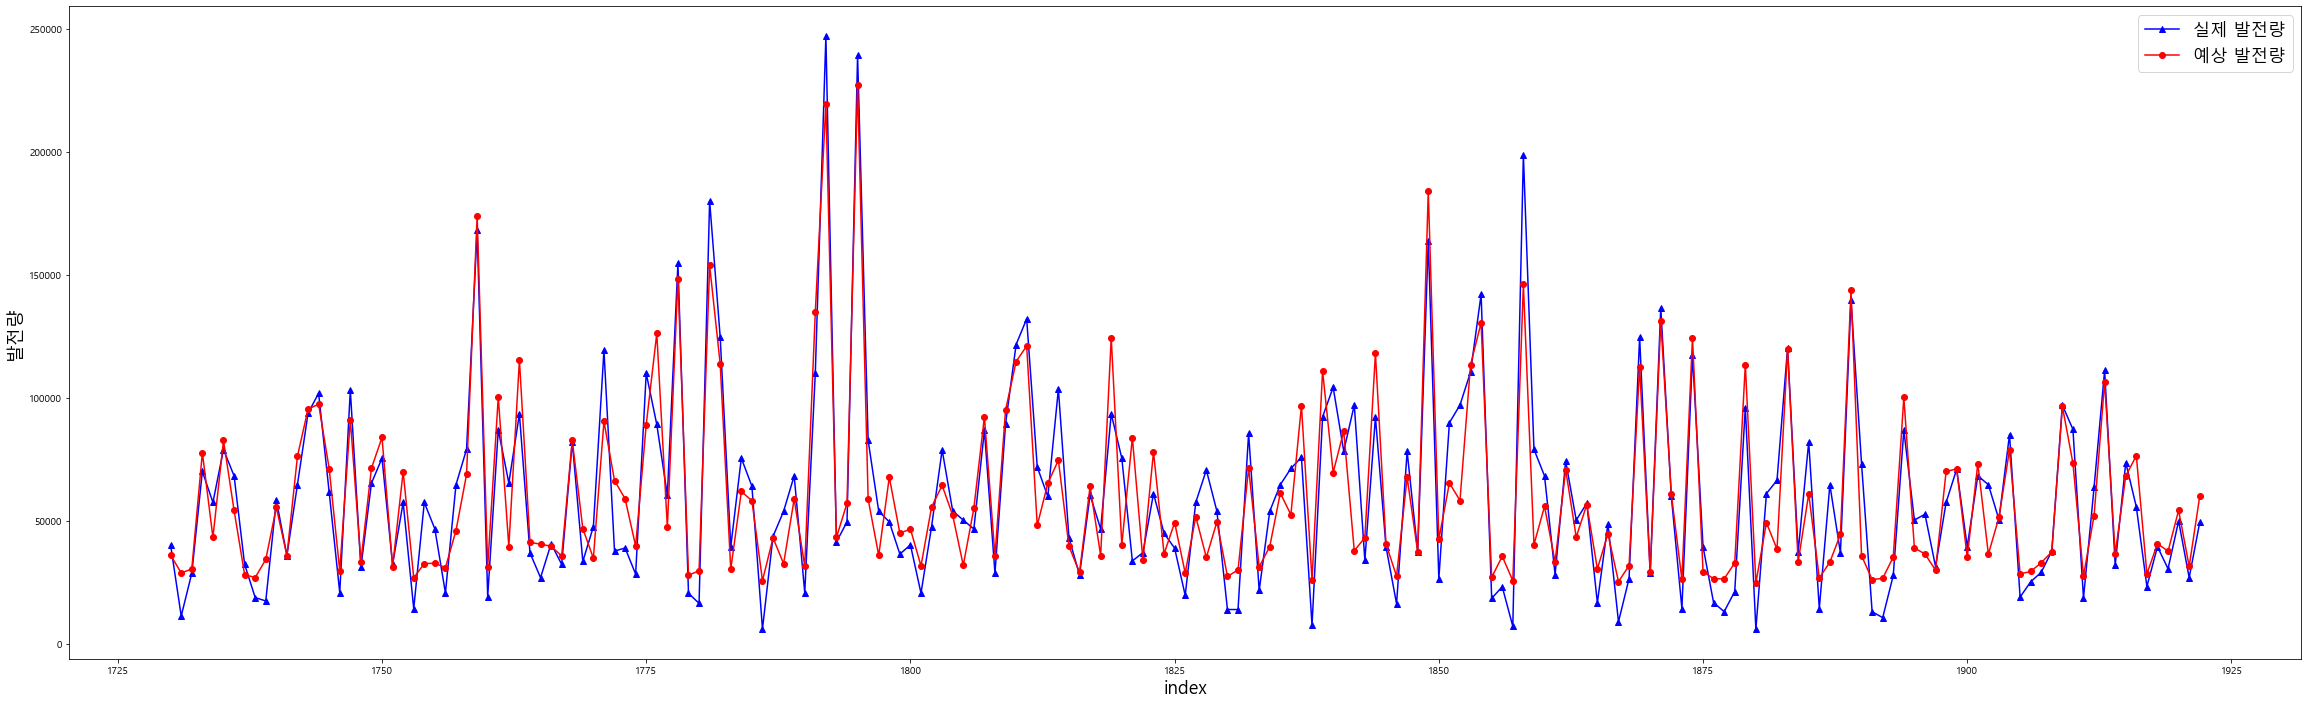

In [77]:
predictions = model_lasso001.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
# plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### GradientBoosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
# 모델생성과 학습
model_gradient = GradientBoostingRegressor(n_estimators=500)
model_gradient.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_gradient.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_gradient.score(X_test, y_test)))

GradientBoostingRegressor(n_estimators=500)

훈련 세트 점수: 0.950249
테스트 세트 점수: 0.854827


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

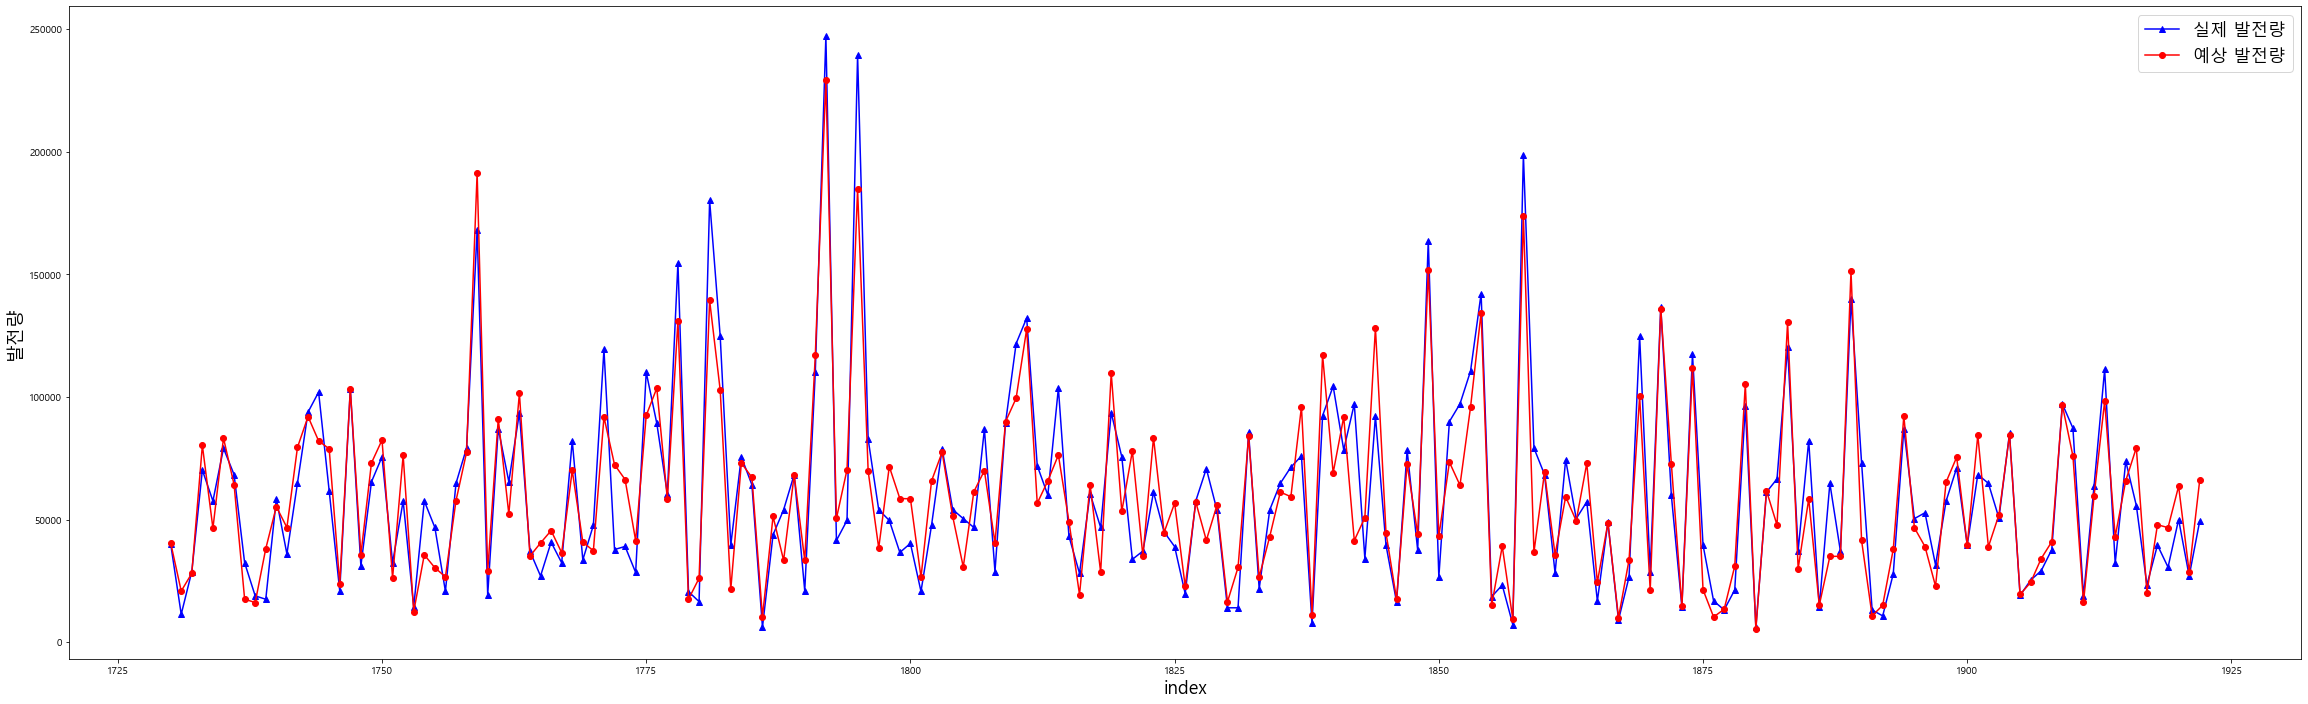

In [80]:
predictions = model_gradient.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
# plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### SVM

In [81]:
from sklearn.svm import SVR

In [168]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
SupportVectorRegModel = make_pipeline(StandardScaler(), SVR(C=40000.0, epsilon=0.5))
SupportVectorRegModel.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(SupportVectorRegModel.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(SupportVectorRegModel.score(X_test, y_test)))

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=40000.0))])

훈련 세트 점수: 0.807059
테스트 세트 점수: 0.855971


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

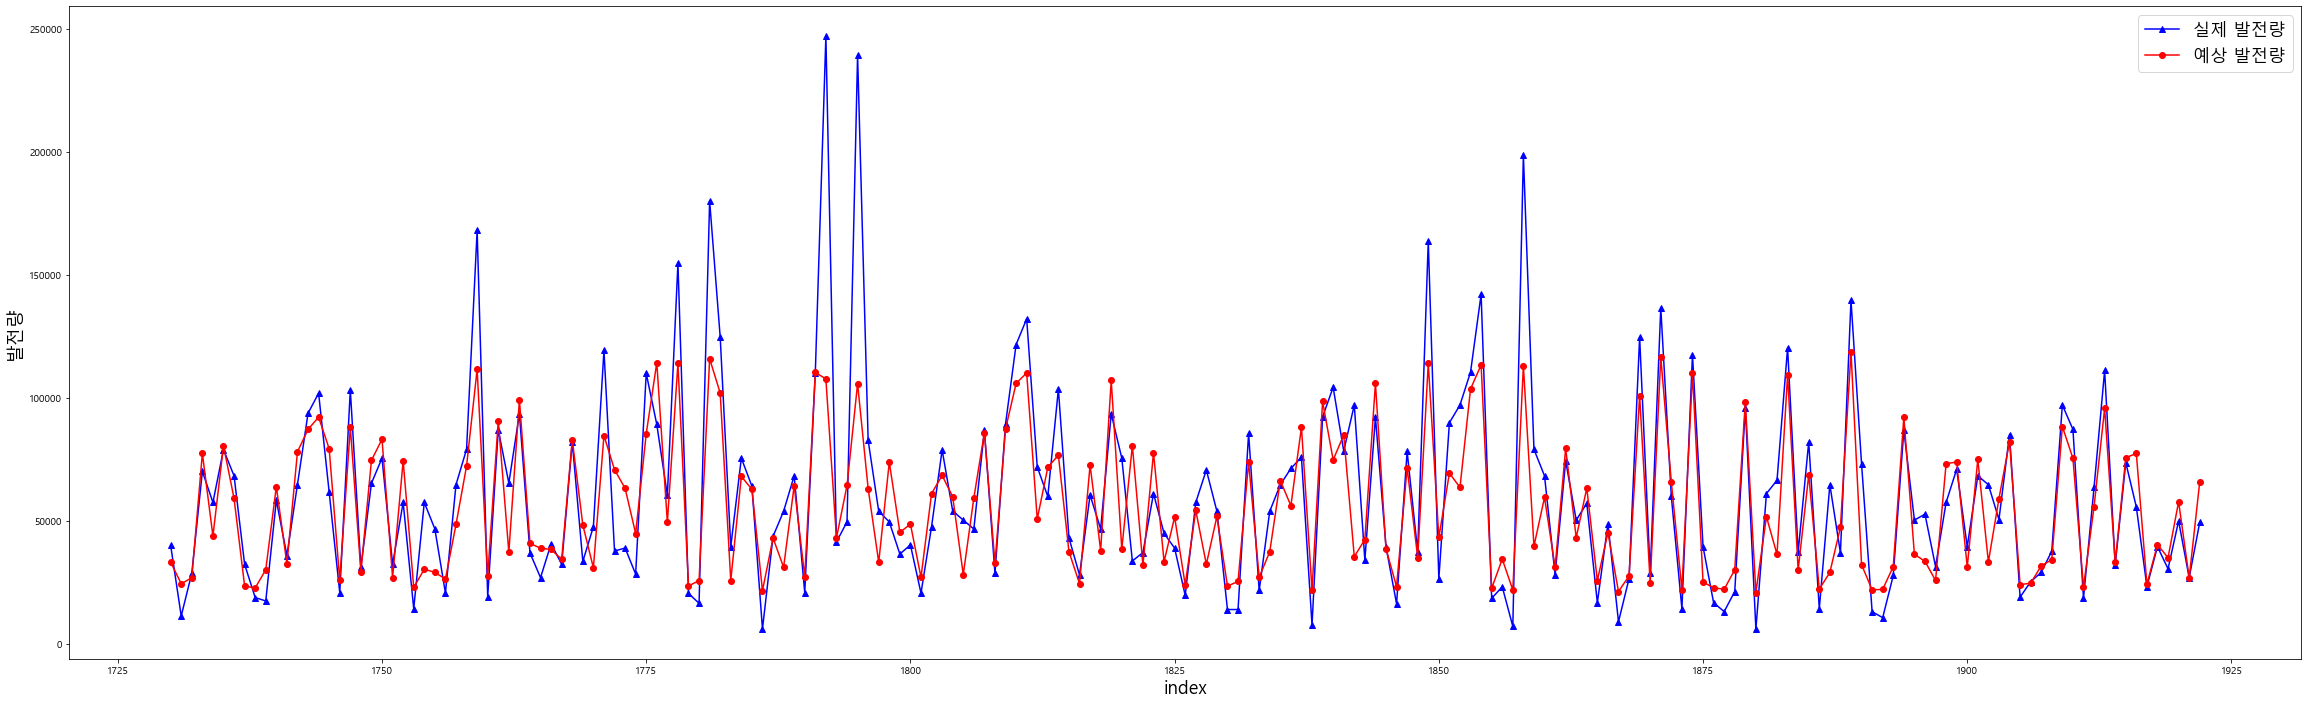

In [83]:
predictions = SupportVectorRegModel.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
# plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
# 모델생성과 학습
model_randomForest = RandomForestRegressor(n_estimators=500)
model_randomForest.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_randomForest.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_randomForest.score(X_test, y_test)))

RandomForestRegressor(n_estimators=500)

훈련 세트 점수: 0.971968
테스트 세트 점수: 0.849694


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

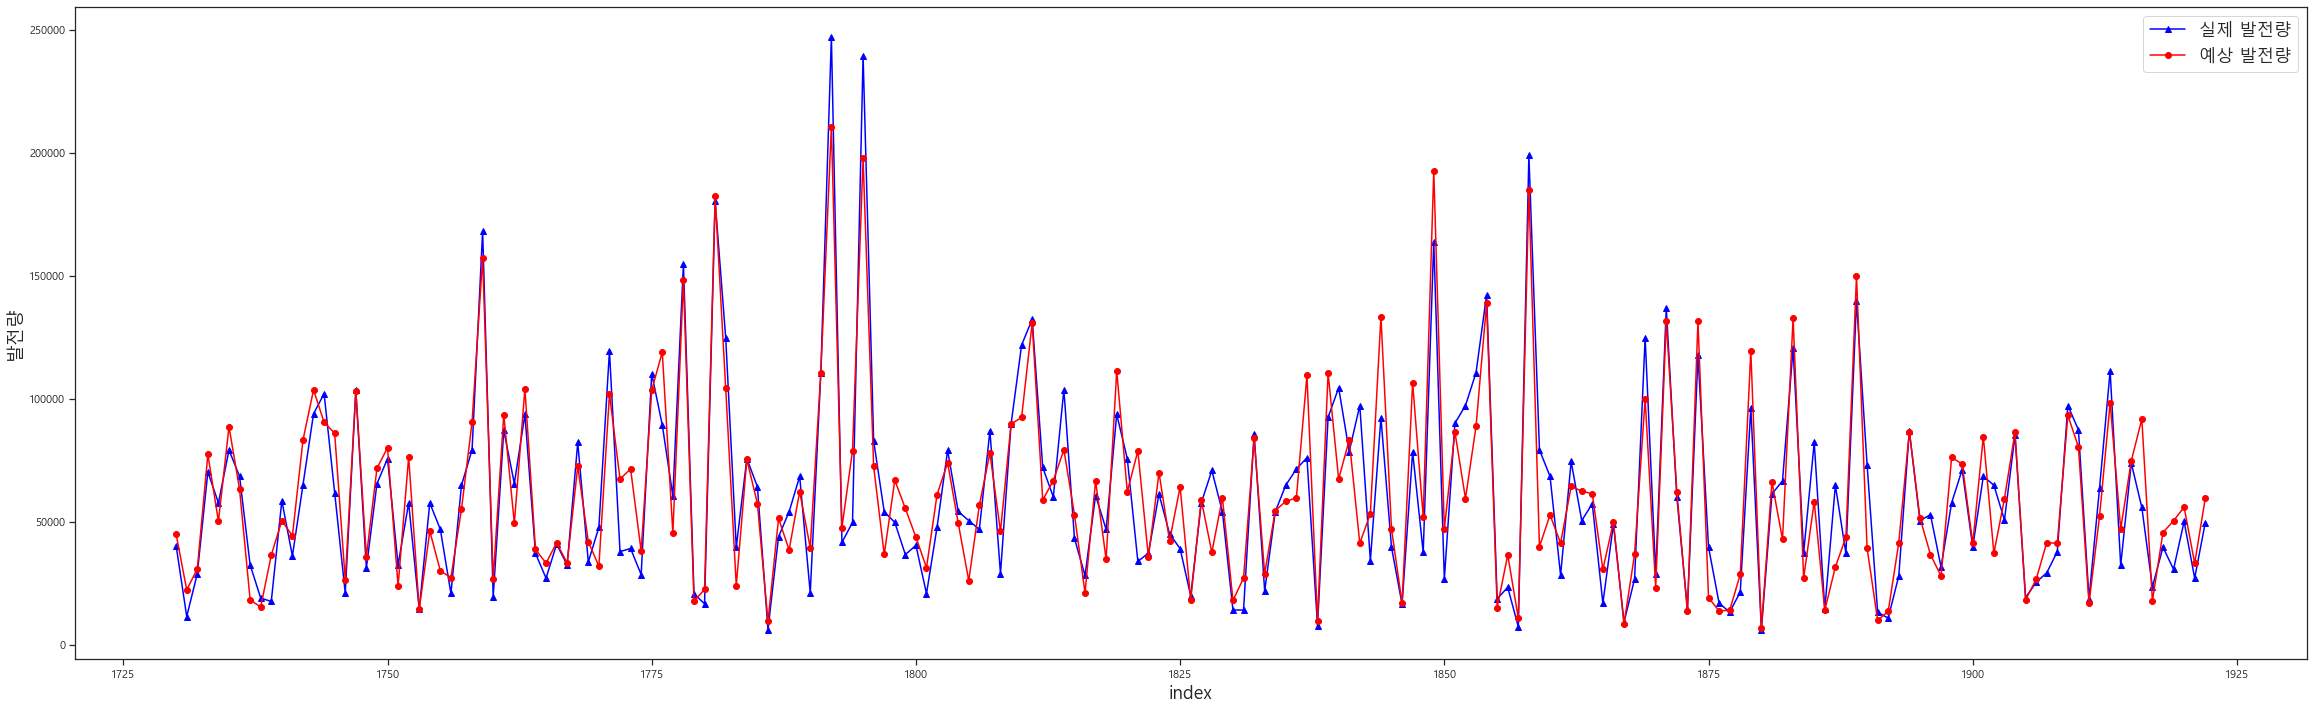

<Figure size 432x288 with 0 Axes>

In [159]:
predictions = model_randomForest.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 잔류시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 잔류시간')
# plt.plot(y_test, 'r--')
# plt.plot(predictions, 'b--')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
# plt.savefig('./predictions_2.png') # test = 0.2
plt.show()
plt.clf()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 0, '날짜')

Text(0, 0.5, '작업 시간')

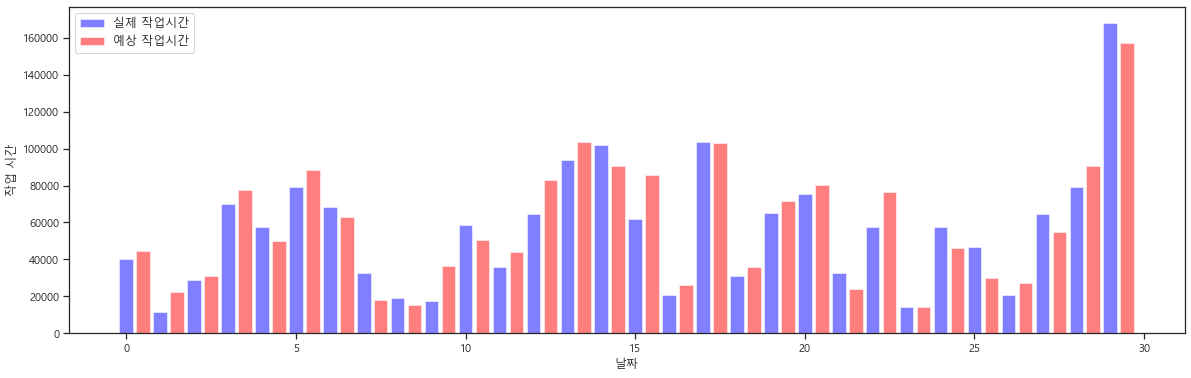

<Figure size 432x288 with 0 Axes>

In [276]:
x = np.arange(len((y_test)))
bar_width = 0.5
alpha=0.5
num = 30
pred = predictions
plt.figure(figsize=(20,6))
p1 = plt.bar(x[:num], y_test[:num], width=0.4,color='blue', alpha=alpha)
p2 = plt.bar(x[:num]+bar_width, predictions[:num], width=0.4, color='red',alpha=alpha)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("작업 시간", fontsize=12)
plt.legend((p1[0], p2[0]), ('실제 작업시간', '예상 작업시간'), fontsize=12)
plt.show()

In [257]:
type(y_test)
type(predictions)

pandas.core.series.Series

numpy.ndarray

In [263]:
result = pd.DataFrame(data=y_test)
result['예상 잔류 시간'] = predictions
result.reset_index(drop=True, inplace=True)
result.head()

,잔류 시간,예상 잔류 시간
0,40140,44793.72
1,11400,22241.36
2,28800,30776.52
3,70200,77343.72
4,57600,50098.24
